## PENGAMBILAN DATA

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [3]:
# jumlah pencarian
maxTweets = 1000

# membuat variable
tweets_list2 = []

#pengambilan data
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('transfer real madrid since:2020-01-01 until:2022-05-31 lang:id').get_items()):
    if i>maxTweets:
        break
    tweets_list2.append([tweet.id, tweet.date, tweet.username, tweet.content])

C:\Users\Asus\AppData\Local\Temp\ipykernel_13272\45360887.py:11: FutureWarning: username is deprecated, use user.username instead
  tweets_list2.append([tweet.id, tweet.date, tweet.username, tweet.content])


In [4]:
# Membuat dataframe
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Tweet Id', 'Datetime', 'Username', 'Text'])
tweets_df2 = tweets_df2.drop_duplicates()
# menampilkan data
tweets_df2.head()

,Tweet Id,Datetime,Username,Text
0,1531411464988160000,2022-05-30 23:05:20+00:00,idextratime,Ada kemungkinan serius Mo Salah akan meninggal...
1,1531360926833704962,2022-05-30 19:44:30+00:00,Paciranid,PILIHAN TRANSFER REAL MADRID PENGGANTI MBAPPE!...
2,1531296860333170689,2022-05-30 15:29:56+00:00,AC_Milan_INA,Isco mengumumkan dirinya resmi tinggalkan Real...
3,1531247688552812544,2022-05-30 12:14:32+00:00,gilabolacom,PILIHAN TRANSFER REAL MADRID PENGGANTI MBAPPE!...
4,1531245283568656384,2022-05-30 12:04:59+00:00,gilabolacom,PILIHAN TRANSFER REAL MADRID PENGGANTI MBAPPE!...


In [5]:
# menyimpan data
tweets_df2.to_csv('latihan.csv', sep=',', index=False)

## PREPROCESSING

In [6]:
# memasang library untuk preprocessing data 

import pandas as pd, numpy as np, nltk, string, re
from pandas import DataFrame

# mebaca data set .csv
def load_data():
    data = pd.read_csv('latihan.csv', nrows=None, header=0, names=['Tanggal','Username','Text'])
    return data

data = load_data()

data.head()

,Tanggal,Username,Text
1531411464988160000,2022-05-30 23:05:20+00:00,idextratime,Ada kemungkinan serius Mo Salah akan meninggal...
1531360926833704962,2022-05-30 19:44:30+00:00,Paciranid,PILIHAN TRANSFER REAL MADRID PENGGANTI MBAPPE!...
1531296860333170689,2022-05-30 15:29:56+00:00,AC_Milan_INA,Isco mengumumkan dirinya resmi tinggalkan Real...
1531247688552812544,2022-05-30 12:14:32+00:00,gilabolacom,PILIHAN TRANSFER REAL MADRID PENGGANTI MBAPPE!...
1531245283568656384,2022-05-30 12:04:59+00:00,gilabolacom,PILIHAN TRANSFER REAL MADRID PENGGANTI MBAPPE!...


In [7]:
# membersihkan data

def url_remove(tweet):
    t = re.sub(r'http\S+', '',tweet)
    return t

def lowercase(tweet):
    return tweet.lower()

def punc_remove(tweet):
    t = re.sub(r'[^\w\s]','',tweet)
    return t

def rt_remove(tweet):
    t = re.sub(r'RT[\s]+', '', tweet)
    return t

def number_remove(tweet):
    t = re.sub('[0-9]+', '', tweet)
    return t
    
def slang_remove(tweet):
    t = re.sub(r'\\n', " ", tweet)
    return t
    
def regex_remove(tweet):
    t = re.sub("b'", " ", tweet)
    return t

def remove_user(tweet):
    t = re.sub('@[^\s]+','',tweet)
    return t

def hashtag_remove(tweet):
    reg = "#(\w+:\/\/S+)"
    return re.sub(reg, " ", tweet)

cleaned = []

def clean_text(tweet):
    for i in tweet:
        cleaned.append(url_remove(punc_remove(number_remove(remove_user(lowercase(regex_remove(hashtag_remove(rt_remove(slang_remove(
            re.sub("[\n\r\t\xa0]"," ",i).strip()))))))))))
clean_text(data["Text"])

data['tweet'] = cleaned
data.head(10)

,Tanggal,Username,Text,tweet
1531411464988160000,2022-05-30 23:05:20+00:00,idextratime,Ada kemungkinan serius Mo Salah akan meninggal...,ada kemungkinan serius mo salah akan meninggal...
1531360926833704962,2022-05-30 19:44:30+00:00,Paciranid,PILIHAN TRANSFER REAL MADRID PENGGANTI MBAPPE!...,pilihan transfer real madrid pengganti mbappe ...
1531296860333170689,2022-05-30 15:29:56+00:00,AC_Milan_INA,Isco mengumumkan dirinya resmi tinggalkan Real...,isco mengumumkan dirinya resmi tinggalkan real...
1531247688552812544,2022-05-30 12:14:32+00:00,gilabolacom,PILIHAN TRANSFER REAL MADRID PENGGANTI MBAPPE!...,pilihan transfer real madrid pengganti mbappe ...
1531245283568656384,2022-05-30 12:04:59+00:00,gilabolacom,PILIHAN TRANSFER REAL MADRID PENGGANTI MBAPPE!...,pilihan transfer real madrid pengganti mbappe ...
1531235724175065088,2022-05-30 11:27:00+00:00,mediamadridista,🚨🌕 - Florentino Pérez telah turun tangan untuk...,florentino pérez telah turun tangan untuk me...
1531230702032850946,2022-05-30 11:07:02+00:00,soccertube77,Deal! Perisic Ke Tottenham🤝 Selamat Tinggal Ab...,deal perisic ke tottenham selamat tinggal abra...
1531225488139489281,2022-05-30 10:46:19+00:00,tikitakaidn,Isco secara resmi mengumumkan bahwa dia akan m...,isco secara resmi mengumumkan bahwa dia akan m...
1531224958336389121,2022-05-30 10:44:13+00:00,GOAL_ID,Isco resmi mengumumkan dia akan meninggalkan R...,isco resmi mengumumkan dia akan meninggalkan r...
1531223908699242503,2022-05-30 10:40:03+00:00,SiaranBolaLive,Isco mengumumkan dirinya resmi tinggalkan Real...,isco mengumumkan dirinya resmi tinggalkan real...


In [8]:
#kamus data
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()

stopword = factory.create_stop_word_remover()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [9]:
#menghilangkan kata yang tidak punya makna
def removeStopWords(text):
    clean_word_list = [word for word in text.split() if word not in stopwords]
    return clean_word_list

stopwords_tweet = data.tweet.apply(removeStopWords)

print(stopwords_tweet)

1531411464988160000    [kemungkinan, serius, mo, salah, meninggalkan,...
1531360926833704962    [pilihan, transfer, real, madrid, pengganti, m...
1531296860333170689    [isco, mengumumkan, dirinya, resmi, tinggalkan...
1531247688552812544    [pilihan, transfer, real, madrid, pengganti, m...
1531245283568656384    [pilihan, transfer, real, madrid, pengganti, m...
                                             ...                        
1445939436546576384    [florentino, perez, meluruskan, kode, berita, ...
1445737353570574336    [presiden, los, blancos, florentino, perez, me...
1445723773345230849    [pakar, transfer, fabrizio, romano, mengungkap...
1445678166907887623    [presiden, real, madrid, florentino, perez, me...
1445651483144245248    [berita, bola, terkini, nova, indonesia, klik,...
Name: tweet, Length: 1001, dtype: object


In [10]:
#melukan stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in stopwords_tweet:
    for term in document:
        if term not in term_dict:
            term_dict[term] = " "
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

stem_tweet = stopwords_tweet.apply(get_stemmed_term)

print(stem_tweet)

3644
------------------------
kemungkinan : mungkin
serius : serius
mo : mo
salah : salah
meninggalkan : tinggal
liverpool : liverpool
status : status
bebas : bebas
transfer : transfer
kontraknya : kontrak
berakhir : akhir
musim : musim
panas : panas
bakalan : bakal
real : real
madrid : madrid
sih : sih
pilihan : pilih
pengganti : ganti
mbappe : mbappe
bintang : bintang
leipzig : leipzig
hotspur : hotspur
munchen : munchen
isco : isco
mengumumkan : umum
dirinya : diri
resmi : resmi
tinggalkan : tinggal
free : free
ancelotti : ancelotti
menyarankan : saran
doi : doi
milan : mil
hehehe : hehehe
sempremilan : sempremilan
l : l
via : via
florentino : florentino
pérez : p rez
turun : turun
tangan : tangan
mengurus : urus
tchouaméni : tchouam ni
mempercepat : cepat
negosiasi : negosiasi
kemenangan : menang
ucl : ucl
kesepakatan : sepakat
kini : kini
semakin : makin
dekat : dekat
deal : deal
perisic : perisic
tottenham : tottenham
selamat : selamat
tinggal : tinggal
abramovich : abramovich
ju

city : city
nusakini : nusakini
penyempurna : sempurna
regenerasi : regenerasi
trio : trio
wak : wak
haji : haji
pedri : pedri
unai : unai
emery : emery
aubameyang : aubameyang
mengecewakan : kecewa
ferran : ferran
gavi : gavi
barca : barca
sepele : sepele
ogah : ogah
bahas : bahas
download : download
aplikasi : aplikasi
akses : akses
mudah : mudah
cepat : cepat
android : android
bikin : bikin
kecewa : kecewa
lawan : lawan
aurélien : aur lien
menandatangani : menandatangani
bersama : sama
madriddan : madriddan
plus : plus
bonus : bonus
fm : fm
universe : universe
tim : tim
pedro : pedro
marques : marques
talles : talles
magno : magno
christian : christian
cifuentes : cifuentes
jadi : jadi
penerus : terus
lini : lini
tengah : tengah
dmf : dmf
menjatuhkan : jatuh
jt : jt
source : source
memakan : makan
ngeriiiii : ngeriiiii
vini : vini
hazardous : hazardous
rodrygo : rodrygo
goes : goes
eduardo : eduardo
camavinga : camavinga
jovic : jovic
vinius : vinius
perpanjang : panjang
panjang : p

mulu : mulu
calma : calma
maksimalkan : maksimal
yakin : yakin
wis : wis
menunjukkan : tunjuk
performa : performa
terbaiknya : baik
kuat : kuat
akibat : akibat
permainan : main
no : no
problem : problem
aporla : aporla
jilid : jilid
dikaitkan : kait
kabarnya : kabar
pemilik : milik
akal : akal
teken : teken
endingnya : endingnya
muak : muak
msh : msh
nunggu : nunggu
umur : umur
mslah : mslah
jembut : jembut
berstatment : berstatment
olah : olah
keluarganya : keluarga
mabbpuk : mabbpuk
memanfaatkan : manfaat
jdi : jdi
memblacklist : memblacklist
periode : periode
selanjutnya : lanjut
is : is
good : good
decision : decision
kian : kian
sesuai : sesuai
keluarga : keluarga
bantah : bantah
nafsu : nafsu
keputusan : putus
diambil : ambil
here : here
go : go
please : please
terakhir : akhir
dah : dah
orang : orang
mikirin : mikirin
target : target
ibunda : ibunda
sebut : sebut
bagusnya : bagus
menangkap : tangkap
ikan : ikan
sekaligus : sekaligus
kesal : kesal
mempertimbangkan : timbang
mahre

abahagarariye : abahagarariye
bagomba : bagomba
guhura : guhura
na : na
cyumweru : cyumweru
gitaha : gitaha
umunyamakuru : umunyamakuru
ari : ari
ku : ku
ibaba : ibaba
ryiyi : ryiyi
lo : lo
tanyak : tanyak
knpa : knpa
kok : kok
limbad : limbad
pastikan : pasti
berpotensi : potensi
madridcity : madridcity
realmadridmanchestercity : realmadridmanchestercity
nonese : nonese
ukurusha : ukurusha
amata : amata
ntagutwara : ntagutwara
ipusiinjangwe : ipusiinjangwe
buretse : buretse
yari : yari
kugenda : kugenda
wenda : wenda
wages : wages
zikajya : zikajya
hejuru : hejuru
ariya : ariya
mafaranga : mafaranga
irikumuha : irikumuha
actually : actually
ntiyayahemba : ntiyayahemba
umukinyireal : umukinyireal
ntamishahara : ntamishahara
ihanitse : ihanitse
igihemba : igihemba
iznyuma : iznyuma
yamakipe : yamakipe
menshi : menshi
parisien : parisien
bertanya : tanya
ibu : ibu
fayza : fayza
lamari : lamar
berbicara : bicara
wawancara : wawancara
putranya : putra
mbappè : mbapp
sesi : sesi
memahami : 

menarik : tarik
terungkap : ungkap
penyerang : serang
mengulur : ulur
tahu : tahu
mei : mei
sepenuhnya : sepenuh
block : block
je : je
sikit : sikit
bebeno : bebeno
barubaru : barubaru
didekati : dekat
mengetahui : tahu
situasi : situasi
konkrit : konkrit
newsutd : newsutd
nerazzurri : nerazzurri
patut : patut
waspada : waspada
dibidik : bidik
intermilan : intermilan
kalem : kalem
kisah : kisah
halhal : halhal
penghalang : halang
dokterbola : dokterbola
jumatberkah : jumatberkah
telikung : telikung
menilai : nilai
berhasil : hasil
kehadiran : hadir
dampak : dampak
maria : maria
özil : zil
essien : essien
carvajal : carvajal
obertan : obertan
owen : owen
valencia : valencia
bebe : bebe
smalling : smalling
young : young
jones : jones
rvp : rvp
get : get
life : life
prop : prop
match : match
quarter : quarter
kamis : kamis
april : april
open : open
gate : gate
coffee : coffee
shop : shop
depok : depok
kelapa : kelapa
k : k
softdrink : softdrink
yogy : yogy
penjualan : jual
tiket : tiket
b

mino : mino
berusaha : usaha
corteganamarca : corteganamarca
lionel : lionel
terusik : usik
mengangkut : angkut
i : i
terbilang : bilang
berani : berani
rongsokan : rongsok
mengamati : amat
cermat : cermat
mengontraknya : kontrak
wajib : wajib
siaga : siaga
emaknya : emaknya
terkait : kait
pilar : pilar
pasif : pasif
besarbesaran : besarbesaran
tuh : tuh
menegosiasikan : negosiasi
diperkirakan : kira
meneruskan : terus
punggung : punggung
radio : radio
diario : diario
mengatkan : mengatkan
sadari : sadar
bang : bang
dodo : dodo
pepatah : pepatah
mengulangi : ulang
lawas : lawas
berseragam : seragam
menyumbangkan : sumbang
double : double
winners : winners
copa : copa
del : del
rey : rey
decima : decima
sepadan : padan
world : world
record : record
andaikan : andai
belah : belah
gigit : gigit
jari : jari
sehat : sehat
monopoli : monopoli
haalandmbappe : haalandmbappe
wana : wana
nia : nia
kumsajili : kumsajili
kama : kama
mchezaji : mchezaji
huru : huru
amepewa : amepewa
mkataba : mkata

berdiri : diri
teguh : teguh
komitmen : komitmen
memonitor : monitor
hugo : hugo
delomlequipe : delomlequipe
klubane : klubane
vallejo : vallejo
penggantinya : ganti
ribu : ribu
fotbollskanalen : fotbollskanalen
hii : hii
bbna : bbna
imekuwa : imekuwa
mbapa : mbapa
borja : borja
mayoral : mayoral
getafe : getafe
borjamayoral : borjamayoral
diproyeksikan : proyeksi
didapatkan : dapat
statusnya : status
kacau : kacau
kessie : kessie
berpisah : pisah
didapat : dapat
franckkessie : franckkessie
svenbotman : svenbotman
lille : lille
memikat : mikat
ngel : ngel
maría : mar a
pengaruh : pengaruh
van : van
gaal : gaal
kesan : kesan
setan : setan
merah : merah
memenangkan : menang
piala : piala
napoli : napoli
alias : alias
oana : oana
terkenal : kenal
gemar : gemar
pemainpemain : pemainpemain
dijuluki : juluk
artinya : arti
bahasa : bahasa
valuasi : valuasi
cies : cies
teratas : atas
takutnya : takut
milih : milih
iki : iki
ae : ae
senenganya : senenganya
incara : incara
kaki : kaki
setia : se

berbisnis : bisnis
flopnya : flop
bisnis : bisnis
persilahkan : silah
wah : wah
terekspos : ekspos
tbtb : tbtb
disisi : sisi
dianggep : dianggep
this : this
brohhh : brohhh
martin : martin
braithwaite : braithwaite
meguire : meguire
label : label
flamengo : flamengo
menyadari : sadar
waktunya : waktu
inginnya : ingin
dikenal : kenal
menghamburkan : hambur
menghasilkan : hasil
tercatat : catat
penghasilan : hasil
sebanyak : banyak
berkhianat : khianat
ulangi : ulang
haram : haram
trent : trent
arnold : arnold
dijadikan : jadi
pelapis : lap
alvaro : alvaro
odriozola : odriozola
o : o
berkisar : kisar
torres : torres
kemanamana : kemanamana
melabeli : label
mahine : mahine
agree : agree
karke : karke
ruk : ruk
jaye : jaye
uske : uske
baad : baad
dede : dede
mujhe : mujhe
nhi : nhi
better : better
baar : baar
jata : jata
but : but
due : due
ho : ho
paya : paya
masalahnya : masalah
memfasilitasi : fasilitas
published : published
memprioritaskan : prioritas
membentuk : bentuk
menyukainya : s

In [11]:
normalizad_word = pd.read_excel("normalization.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

normal_tweet = stem_tweet.apply(normalized_term).str.join(" ")

print(normal_tweet)

1531411464988160000    mungkin serius mau salah tinggal liverpool sta...
1531360926833704962    pilih transfer real madrid ganti mbappe bintan...
1531296860333170689    isco umum diri resmi tinggal real madrid statu...
1531247688552812544    pilih transfer real madrid ganti mbappe bintan...
1531245283568656384    pilih transfer real madrid ganti mbappe bintan...
                                             ...                        
1445939436546576384    florentino perez lurus kode berita transfer ky...
1445737353570574336    presiden los blancos florentino perez ungkap h...
1445723773345230849    pakar transfer fabrizio romano ungkap psg puny...
1445678166907887623    presiden real madrid florentino perez beri isy...
1445651483144245248    berita bola kini nova indonesia klik presiden ...
Name: tweet, Length: 1001, dtype: object


In [12]:
#hasil bersih data yang sudah di cleaning

data_preprocess = normal_tweet

data_preprocess

1531411464988160000    mungkin serius mau salah tinggal liverpool sta...
1531360926833704962    pilih transfer real madrid ganti mbappe bintan...
1531296860333170689    isco umum diri resmi tinggal real madrid statu...
1531247688552812544    pilih transfer real madrid ganti mbappe bintan...
1531245283568656384    pilih transfer real madrid ganti mbappe bintan...
                                             ...                        
1445939436546576384    florentino perez lurus kode berita transfer ky...
1445737353570574336    presiden los blancos florentino perez ungkap h...
1445723773345230849    pakar transfer fabrizio romano ungkap psg puny...
1445678166907887623    presiden real madrid florentino perez beri isy...
1445651483144245248    berita bola kini nova indonesia klik presiden ...
Name: tweet, Length: 1001, dtype: object

In [13]:
clean={"Username":data['Username'], "Cleaned_Text":data_preprocess}

df=pd.DataFrame(clean)
df.to_excel("preprocessing_latihan.xlsx", index=False, encoding='utf8')

## DATA TRAINING

In [14]:
#membaca data

df = pd.read_excel (r'pelabelan_manual.xlsx', sheet_name='Sheet1')
df=pd.DataFrame(df)
df

,no,tanggal,username,tweet,label,kelas
0,1,2012-03-07 17:32:43+00:00,agentaruhanbola,account transfer main bola situs taruh bola li...,Positif,1
1,2,2010-06-20 09:15:32+00:00,baskaramp,aduh aduh kangen liga inggris spanyol itali ni...,Positif,1
2,3,2021-04-15 16:30:00+00:00,Bolanet,akhir spekulasi barcelona segera umum transfer...,Negatif,0
3,4,2021-04-15 10:28:14+00:00,M88Indo,akhir spekulasi barcelona segera umum transfer...,Negatif,0
4,5,2020-08-30 15:51:35+00:00,_fireshare,aku masuk opini kalau macam insentif bisnis sp...,Negatif,0
...,...,...,...,...,...,...
595,596,2021-04-19 02:10:14+00:00,anggaimaginer,wabilkhusus barcelona bikin hutang sebenernya ...,Negatif,0
596,597,2021-08-25 11:23:58+00:00,minggussenin,waduuuhh bahaya nih transfer main atlet musim ...,Negatif,0
597,598,2012-09-01 14:35:00+00:00,febriantopw,weseet edan tenan psg i moso keluar transfer m...,Negatif,0
598,599,2011-06-30 16:04:19+00:00,maudyannisa,yeye tidak masuk d spesial transfer main binta...,Negatif,0


In [15]:
#jumlah data yang sudaah di label
df.label.value_counts()

Positif    300
Negatif    300
Name: label, dtype: int64

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

d1 = "real madrid lineup ganti raphael varane tengah minat transfer manchester united"
d2 = "real madrid tumbal vinicius junior transfer kylian mbappe"
d3 = "update transfer main sergio aguero sepakat gabung barcelona kontrak tahun depan"
d4 = "rumor transfer sergio aguero sepakat gabung barcelona musim depan"

vect = TfidfVectorizer()
X = vect.fit_transform([d1, d2, d3, d4])

X.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.32417842,
        0.        , 0.        , 0.        , 0.32417842, 0.25558599,
        0.        , 0.32417842, 0.        , 0.32417842, 0.        ,
        0.32417842, 0.25558599, 0.        , 0.        , 0.        ,
        0.        , 0.32417842, 0.16916975, 0.        , 0.32417842,
        0.        , 0.32417842, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.39176533, 0.        , 0.39176533, 0.        , 0.30887228,
        0.        , 0.        , 0.39176533, 0.        , 0.        ,
        0.        , 0.30887228, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2044394 , 0.39176533, 0.        ,
        0.        , 0.        , 0.39176533],
       [0.2787129 , 0.2787129 , 0.2787129 , 0.2787129 , 0.        ,
        0.        , 0.35351198, 0.        , 0.        , 0.        ,
        0.35351198, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
list(zip(X.toarray()[0], vect.get_feature_names()))

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[(0.0, 'aguero'),
 (0.0, 'barcelona'),
 (0.0, 'depan'),
 (0.0, 'gabung'),
 (0.32417842259348545, 'ganti'),
 (0.0, 'junior'),
 (0.0, 'kontrak'),
 (0.0, 'kylian'),
 (0.32417842259348545, 'lineup'),
 (0.255585991926846, 'madrid'),
 (0.0, 'main'),
 (0.32417842259348545, 'manchester'),
 (0.0, 'mbappe'),
 (0.32417842259348545, 'minat'),
 (0.0, 'musim'),
 (0.32417842259348545, 'raphael'),
 (0.255585991926846, 'real'),
 (0.0, 'rumor'),
 (0.0, 'sepakat'),
 (0.0, 'sergio'),
 (0.0, 'tahun'),
 (0.32417842259348545, 'tengah'),
 (0.16916974924594824, 'transfer'),
 (0.0, 'tumbal'),
 (0.32417842259348545, 'united'),
 (0.0, 'update'),
 (0.32417842259348545, 'varane'),
 (0.0, 'vinicius')]

In [18]:
list(zip(X.toarray()[1], vect.get_feature_names()))

[(0.0, 'aguero'),
 (0.0, 'barcelona'),
 (0.0, 'depan'),
 (0.0, 'gabung'),
 (0.0, 'ganti'),
 (0.39176532687938803, 'junior'),
 (0.0, 'kontrak'),
 (0.39176532687938803, 'kylian'),
 (0.0, 'lineup'),
 (0.3088722835775363, 'madrid'),
 (0.0, 'main'),
 (0.0, 'manchester'),
 (0.39176532687938803, 'mbappe'),
 (0.0, 'minat'),
 (0.0, 'musim'),
 (0.0, 'raphael'),
 (0.3088722835775363, 'real'),
 (0.0, 'rumor'),
 (0.0, 'sepakat'),
 (0.0, 'sergio'),
 (0.0, 'tahun'),
 (0.0, 'tengah'),
 (0.20443939970227634, 'transfer'),
 (0.39176532687938803, 'tumbal'),
 (0.0, 'united'),
 (0.0, 'update'),
 (0.0, 'varane'),
 (0.39176532687938803, 'vinicius')]

In [19]:
vect = TfidfVectorizer(max_features=600, binary=True)
X = vect.fit_transform(df.tweet)

X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5054859 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.51594285,
        0.58317616]])

In [20]:
from sklearn.model_selection import train_test_split

X = df.tweet
y = df.kelas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=600, binary=True)
X_train_vect = vect.fit_transform(X_train)

print(X_train_vect)

  (0, 508)	0.07970572155778928
  (0, 550)	0.27525918473725586
  (0, 427)	0.19943919861165893
  (0, 53)	0.262229102410865
  (0, 506)	0.20884387925165085
  (0, 472)	0.23688223346695875
  (0, 557)	0.04548206394343499
  (0, 202)	0.23083415051126194
  (0, 144)	0.262229102410865
  (0, 348)	0.16026057435290633
  (0, 551)	0.2438642328376528
  (0, 108)	0.262229102410865
  (0, 226)	0.18300199618478694
  (0, 21)	0.21641031694298724
  (0, 306)	0.0789075803515816
  (0, 285)	0.11781505998803384
  (0, 434)	0.22072723345714237
  (0, 40)	0.262229102410865
  (0, 15)	0.2438642328376528
  (0, 250)	0.2521221853567454
  (0, 337)	0.19943919861165893
  (0, 9)	0.2254993632644406
  (1, 370)	0.4844727044380441
  (1, 58)	0.4844727044380441
  (1, 101)	0.4844727044380441
  :	:
  (478, 171)	0.31075068478432705
  (478, 307)	0.3341526233525376
  (478, 593)	0.3507565630061961
  (478, 70)	0.25414086690879956
  (478, 290)	0.31075068478432705
  (478, 272)	0.2384458638687949
  (478, 214)	0.2412618507485374
  (478, 396)	0.1

In [22]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)

In [23]:
import numpy as np

unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

[(0, 241), (1, 241)]


## NAIVE BAYES CLASIFIER

In [24]:
#Libary NBC
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_res, y_train_res)
nb.score(X_train_res, y_train_res)

0.91701244813278

In [25]:
# variable untuk prediksi

X_test_vect = vect.transform(X_test)

y_pred = nb.predict(X_test_vect)

y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [26]:
# mengukur akurasi dan f1-score 

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred, average='weighted') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 80.83%

F1 Score: 80.83

COnfusion Matrix:
 [[50 11]
 [12 47]]


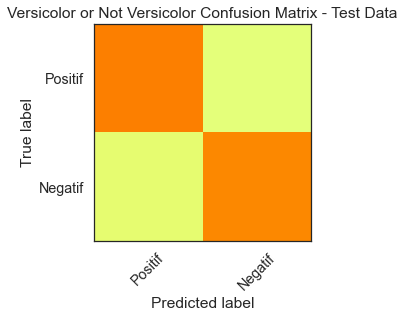

In [27]:
#pembuatan matriks TP, TN. FP, FN

import math
import random
from collections import defaultdict
from pprint import pprint

# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt

# Set global styles for plots
sns.set_style(style='white')
sns.set_context(context='notebook', font_scale=1.3, rc={'figure.figsize': (16,9)})

cm=confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Positif','Negatif']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

plt.show()

## CROSS VALIDATION

In [28]:
# Library untuk membagi data training
from sklearn.model_selection import ShuffleSplit

X = df.tweet
y = df.kelas

ss = ShuffleSplit(n_splits=10, test_size=0.2)
sm = SMOTE()

accs = []
f1s = []
cms = []

for train_index, test_index in ss.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit vectorizer and transform X train, then transform X test
    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)
    
    # Oversample
    X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)
    
    # Fit Naive Bayes on the vectorized X with y train labels, 
    # then predict new y labels using X test
    nb.fit(X_train_res, y_train_res)
    y_pred = nb.predict(X_test_vect)
    
    # Determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average='weighted'))
    cms.append(confusion_matrix(y_test, y_pred))
    
print("\nAverage accuracy across folds: {:.2f}%".format(sum(accs) / len(accs) * 100))
print("\nAverage F1 score across folds: {:.2f}%".format(sum(f1s) / len(f1s) * 100))
print("\nAverage Confusion Matrix across folds: \n {}".format(sum(cms) / len(cms)))


Average accuracy across folds: 82.58%

Average F1 score across folds: 82.60%

Average Confusion Matrix across folds: 
 [[49.1 11.5]
 [ 9.4 50. ]]


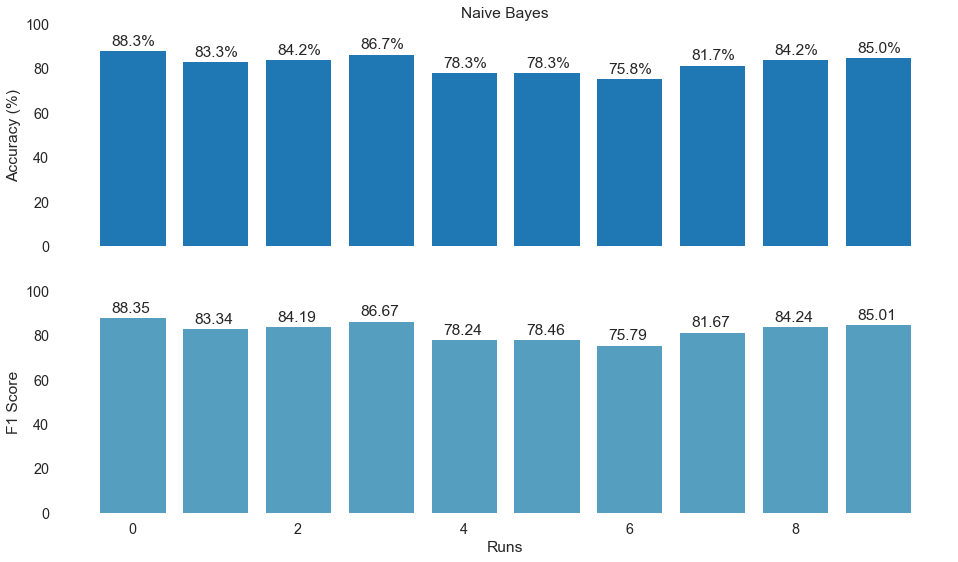

In [29]:
#pengujian k fold sebanyak 10 kali

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,9))

acc_scores = [round(a * 100, 1) for a in accs]
f1_scores = [round(f * 100, 2) for f in f1s]

x1 = np.arange(len(acc_scores))
x2 = np.arange(len(f1_scores))

ax1.bar(x1, acc_scores)
ax2.bar(x2, f1_scores, color='#559ebf')

# Place values on top of bars
for i, v in enumerate(list(zip(acc_scores, f1_scores))):
    ax1.text(i - 0.25, v[0] + 2, str(v[0]) + '%')
    ax2.text(i - 0.25, v[1] + 2, str(v[1]))

ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Naive Bayes')
ax1.set_ylim([0, 100])

ax2.set_ylabel('F1 Score')
ax2.set_xlabel('Runs')
ax2.set_ylim([0, 100])

sns.despine(bottom=True, left=True)  # Remove the ticks on axes for cleaner presentation

plt.show()

In [30]:
#Membuat model klasifikasi, dimasukkan ke dalam file model_classifier_nbc.pickle
import os
import pickle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer


X = df.tweet
y = df.kelas

txt_classifier = Pipeline([('vect', TfidfVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', MultinomialNB(alpha=1.0)),
                     ])
X_train = np.asarray(X)
txt_classifier = txt_classifier.fit(X_train, np.asarray(y))

In [31]:
#simpan ke PICKLE
files = open('model_nbc.pickle', 'wb')
pickle.dump(txt_classifier, files)
files.close()

print('Proses Training Naive Bayes Selesai!')

Proses Training Naive Bayes Selesai!


In [32]:
#simpan ke PICKLE
model = open('model_nbc.pickle', 'rb')
nbc_classifier = pickle.load(model)
print(nbc_classifier)

Pipeline(steps=[('vect', TfidfVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])


In [33]:
df_tweet = pd.read_excel (r'data_testing.xlsx')
df_tweet=pd.DataFrame(df_tweet)
df_tweet=df_tweet.dropna()
df_tweet.head()

,no,tanggal,username,tweet
0,1,2020-09-08 05:38:02+00:00,OctaHannnnn,afk transfer deal done everton resmi dapat jam...
1,2,2020-09-08 00:01:51+00:00,barcastuff_idn,agen lautaro martinez datang italia barcelona ...
2,3,2020-09-04 17:18:38+00:00,neragrana,akhir saga transfer lionel messi bintang asal ...
3,4,2021-08-29 01:22:04+00:00,adit_putra08,aku manajemen chelsea jdi lebih bagus skrng so...
4,5,2020-09-09 21:30:00+00:00,indosportdotcom,anchester united pasti dapat untung real madri...


In [34]:
data_tweet = df_tweet.tweet
pd.DataFrame(data_tweet)

,tweet
0,afk transfer deal done everton resmi dapat jam...
1,agen lautaro martinez datang italia barcelona ...
2,akhir saga transfer lionel messi bintang asal ...
3,aku manajemen chelsea jdi lebih bagus skrng so...
4,anchester united pasti dapat untung real madri...
...,...
195,video bursa transfer chelsea pinjam bintang ba...
196,wujud ingin ronald koeman belanja main petingg...
197,wujud ingin ronald koeman belanja main petingg...
198,yang takut kalo saing macam real madridjuventu...


In [35]:
#melakukan prediksi
predicted = nbc_classifier.predict(np.asarray(data_tweet))
predicted

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [36]:
#menampilkan hasil positif dan negatif
result_tweet=[]
for i in range(len(predicted)):
    if(predicted[i]==1):
        sentiment_result='Positif'
    elif(predicted[i]==0):
        sentiment_result='Negatif'
#     result_tweet.append({'class':prediction_linear[i], 'result_nbc':sentiment_result})
    result_tweet.append({'Cleaned_Text':data_tweet[i], 'class':predicted[i] })

In [37]:
data=pd.DataFrame(result_tweet)
data.head()

,Cleaned_Text,class
0,afk transfer deal done everton resmi dapat jam...,1
1,agen lautaro martinez datang italia barcelona ...,0
2,akhir saga transfer lionel messi bintang asal ...,0
3,aku manajemen chelsea jdi lebih bagus skrng so...,0
4,anchester united pasti dapat untung real madri...,1


In [38]:
data.to_excel('testing_bursa.xlsx')


## DATA TESTING 

In [50]:

import pandas as pd
df = pd.read_excel('testing_bursa2.xlsx')
df = pd.DataFrame(df)
df = df.dropna()
df

#menghitung jumlah TP, FP, TN dan FN

df.loc[(df['actual'] == 1) & (df['predicted'] == 1), 'keterangan'] = 'TP'
df.loc[(df['actual'] == 1) & (df['predicted'] == 0), 'keterangan'] = 'FP'
df.loc[(df['actual'] == 0) & (df['predicted'] == 0), 'keterangan'] = 'TN'
df.loc[(df['actual'] == 0) & (df['predicted'] == 1), 'keterangan'] = 'FN'
df

,Unnamed: 0,Cleaned_Text,actual,predicted,keterangan
0,1,afk transfer deal done everton resmi dapat jam...,0,1,FN
1,2,agen lautaro martinez datang italia barcelona ...,1,0,FP
2,3,akhir saga transfer lionel messi bintang asal ...,0,0,TN
3,4,aku manajemen chelsea jdi lebih bagus skrng so...,1,0,FP
4,5,anchester united pasti dapat untung real madri...,1,1,TP
...,...,...,...,...,...
195,196,video bursa transfer chelsea pinjam bintang ba...,1,0,FP
196,197,wujud ingin ronald koeman belanja main petingg...,1,0,FP
197,198,wujud ingin ronald koeman belanja main petingg...,1,0,FP
198,199,yang takut kalo saing macam real madridjuventu...,0,0,TN


In [51]:
df.groupby(by='keterangan').agg('count')

,Unnamed: 0,Cleaned_Text,actual,predicted
keterangan,,,,
FN,18,18,18,18
FP,54,54,54,54
TN,82,82,82,82
TP,46,46,46,46


In [52]:
TP=df['keterangan'].value_counts()['TP']
TN=df['keterangan'].value_counts()['TN']
FP=df['keterangan'].value_counts()['FP']
FN=df['keterangan'].value_counts()['FN']

In [53]:
#menghitung akurasi data testing
accuracy = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy =', accuracy)

Accuracy = 0.64


In [54]:
#menghitung precission data testing
precission = (TP) / (TP+FP)
print('Precission =', precission)

Precission = 0.46


In [55]:
#menghitung recall data testing
recall = (TP) / (TP + FN)
print('Recall =', recall)

Recall = 0.71875


In [57]:
#menghitung f1-score data testing
F1_Score = 2 * (recall*precission) / (recall + precission)
print('F1Score =', F1_Score)

F1Score = 0.5609756097560976
